In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
%config InlineBackend.figure_format = "svg"

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_train = np.array(y_train).reshape(-1, )
y_test = np.array(y_test).reshape(-1, )

In [ ]:
y_train

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
y_train.shape

In [ ]:
y_train

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

In [ ]:
vgg16.summary()

In [ ]:
model = tf.keras.Sequential()

In [ ]:
for layer in vgg16.layers:
    model.add(layer)

In [ ]:
for layer in model.layers[:-2]:
    layer.trainable = False

In [ ]:
model.summary()

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    validation_split=0.2
)

In [ ]:
history.history.keys()

In [ ]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.legend(['loss', 'accuracy'])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_test.shape, y_predicted.shape

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_predicted = np.argmax(y_predicted, axis=1)

In [ ]:
con_matrix = confusion_matrix(y_test, y_predicted)

In [ ]:
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
CR = classification_report(y_test, y_predicted)
CR

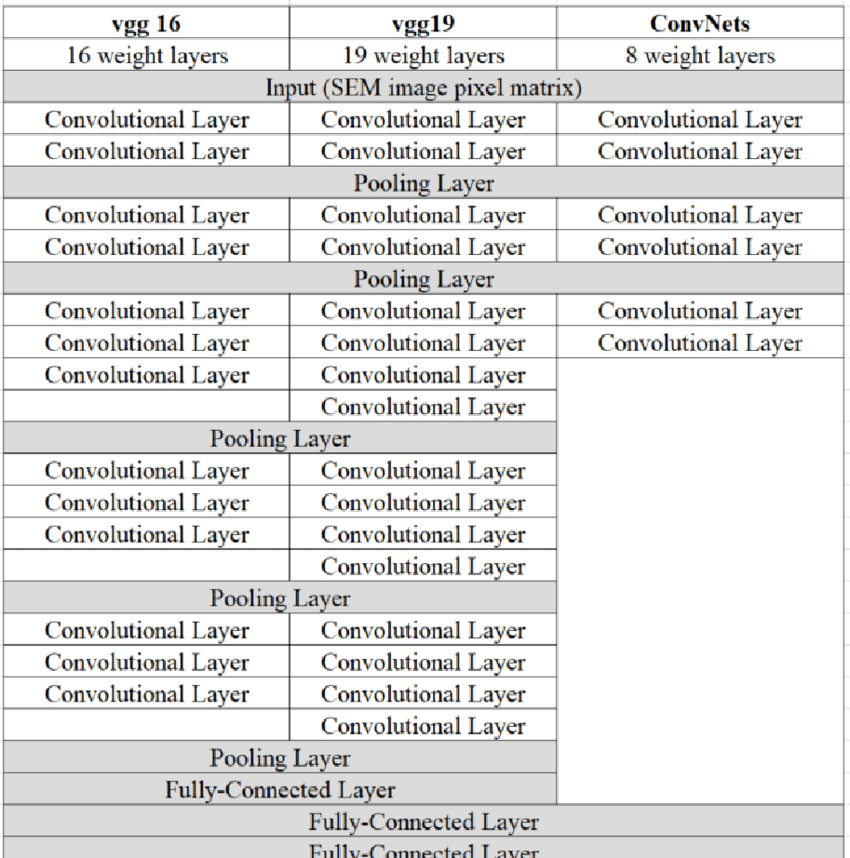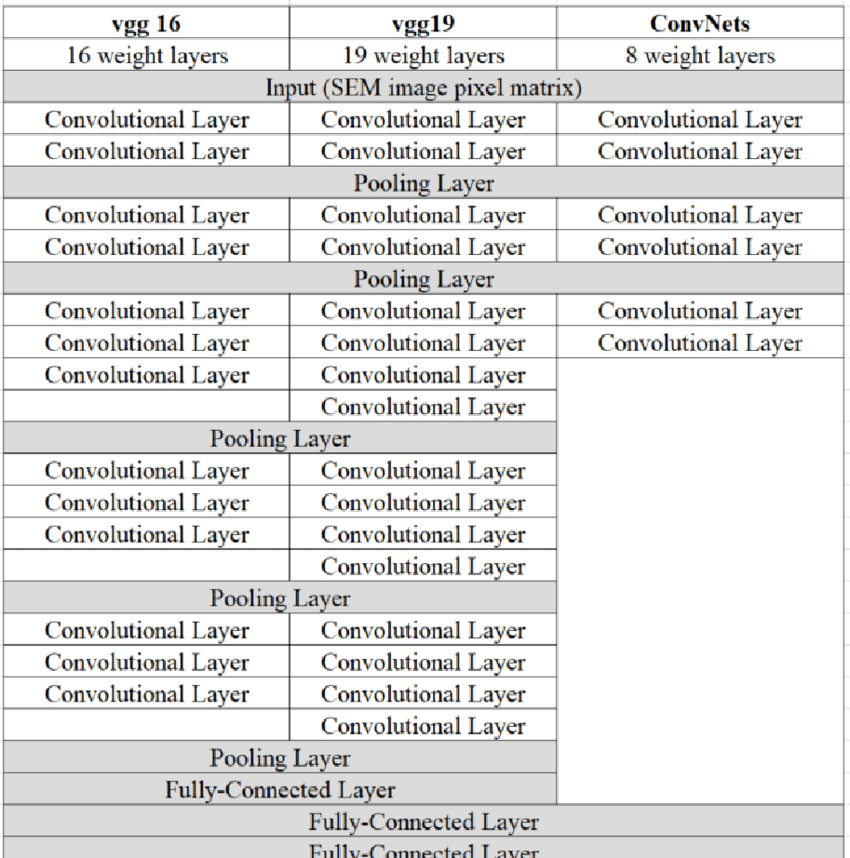

In [ ]:
X_train_resized=tf.image.resize(X_train,(64,64))
X_train_resized.shape

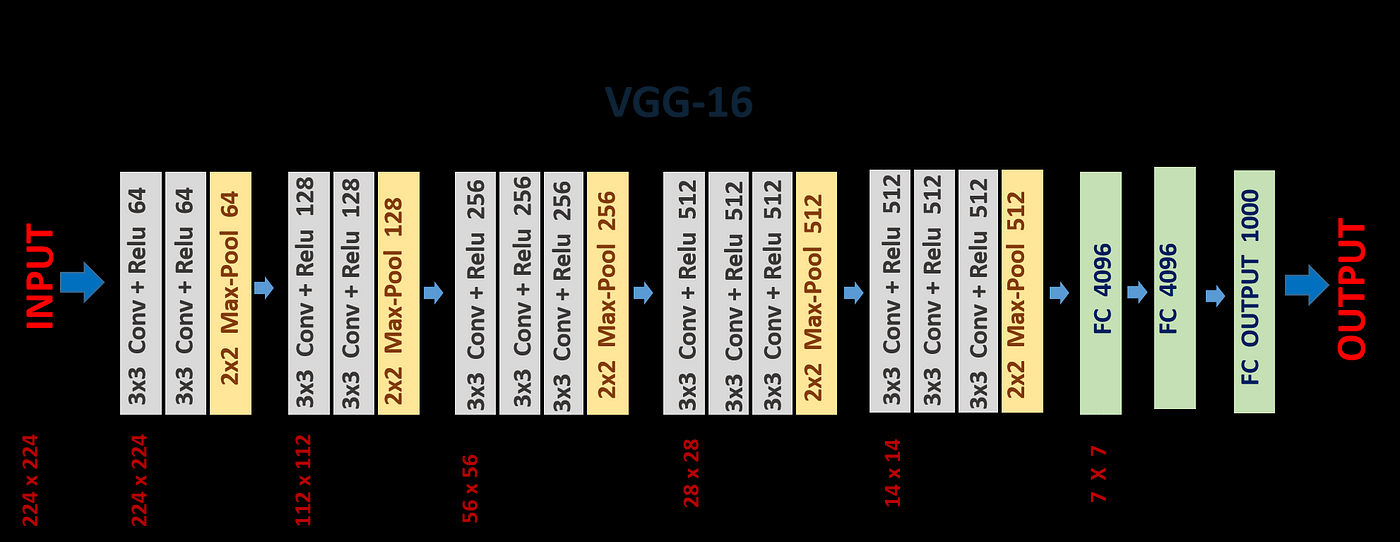

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential(
    [   # THE Batch Normalization added to centaralize And Normalize Data to increase accuracy but the base vgg-16 model doesn't have batch normalization 
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64,64,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2),strides=2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2),strides=2),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2),strides=2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2),strides=2),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [ ]:
model2.summary()

In [ ]:
model2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0000001),
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    X_train_resized,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

In [ ]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.legend(['loss', 'accuracy'])
plt.show()

In [ ]:
y_test = pd.get_dummies(y_test)

In [ ]:
model2.evaluate(X_test_resized, y_test)

In [ ]:
X_test_resized=tf.image.resize(X_test,(64,64))
X_test_resized.shape

In [ ]:
y_predicted2 = model2.predict(X_test_resized)

In [ ]:
y_test.shape, y_predicted2.shape

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_predicted2 = np.argmax(y_predicted2, axis=1)

In [ ]:
con_matrix2 = confusion_matrix(y_test, y_predicted2)

In [ ]:
sns.heatmap(con_matrix2, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
CR2 = classification_report(y_test, y_predicted2)
CR2

Res_Net from scratch

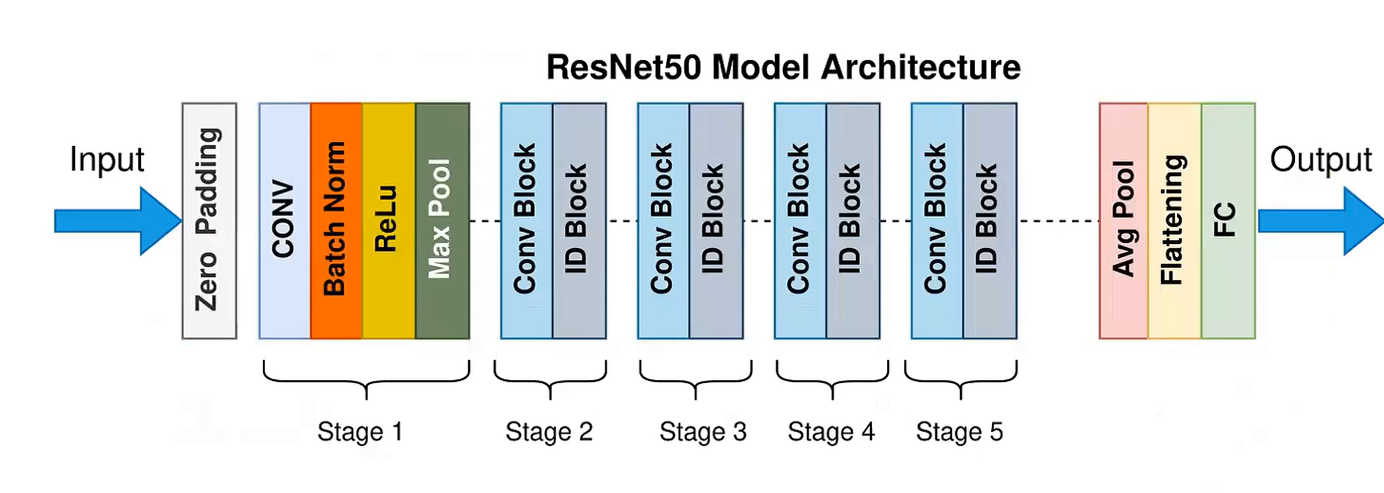

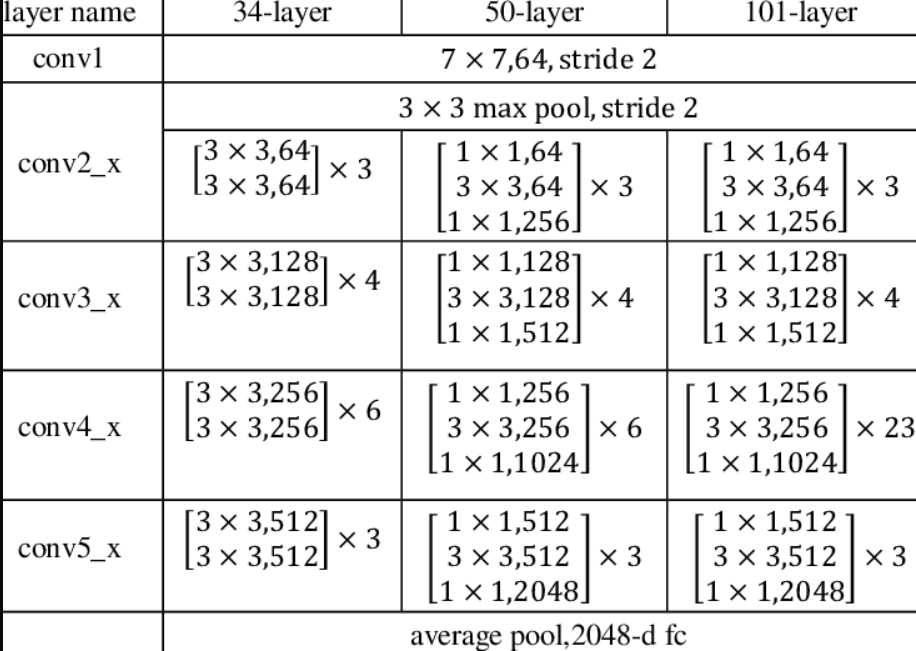

In [ ]:
import tensorflow as tf

# the diffrence between Identify_block and skip connection block is the skip connection which the skip connection on Convolution 
#block has a cnn layer with depth = the depth of last cnn
#convloution blocks used with the dimentionality of the input and the output doesn't same
#but in the identify_block the input = the output of skip connection without any changes  it used when the input and outpus are same in dimentions 
# used to save performance 


def identity_block(x, number_conv_blocks, filters):
    filters1, filters2, filters3 = filters
    skip_x = x
    
    for _ in range(number_conv_blocks):
        x = tf.keras.layers.Conv2D(filters1, (1, 1), padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)

        x = tf.keras.layers.Conv2D(filters2, (3, 3), padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)

        x = tf.keras.layers.Conv2D(filters3, (1, 1), padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Add()([x, skip_x])
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, number_conv_blocks, filters, strides=(2, 2)):
    f1, f2, f3 = filters
    skip_x = tf.keras.layers.Conv2D(f3, (1, 1), padding='same', strides=strides)(x)
    
    for _ in range(number_conv_blocks):
        x = tf.keras.layers.Conv2D(f1, (1, 1), padding='same', strides=strides)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)

        x = tf.keras.layers.Conv2D(f2, (3, 3), padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)

        x = tf.keras.layers.Conv2D(f3, (1, 1), padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Add()([x, skip_x])
    x = tf.keras.layers.Activation('relu')(x)

    return x

def res_net_50(input_shape=(32, 32, 3), classes=10):
    
    
#     CONV BLOCKS
#     Stage 2: 2 identity blocks
#     CONV BLOCKS
#     Stage 3: 3 identity blocks
#     CONV BLOCKS
#     Stage 4: 5 identity blocks
#     CONV BLOCKS
#     Stage 5: 2 identity blocks
#     

    inputs = tf.keras.layers.Input(input_shape)

   #first stage 
    x = tf.keras.layers.ZeroPadding2D((3, 3))(inputs)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Stage 2
    x = convolutional_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])

    # Stage 3
    x = convolutional_block(x, 4, [128, 128, 512])
    x = identity_block(x, 4, [128, 128, 512])
    x = identity_block(x, 4, [128, 128, 512])
    x = identity_block(x, 4, [128, 128, 512])

    # Stage 4
    x = convolutional_block(x, 6, [256, 256, 1024])
    x = identity_block(x, 6, [256, 256, 1024])
    x = identity_block(x, 6, [256, 256, 1024])
    x = identity_block(x, 6, [256, 256, 1024])
    x = identity_block(x, 6, [256, 256, 1024])
    x = identity_block(x, 6, [256, 256, 1024])

    # Stage 5
    x = convolutional_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # Output layer
    x = tf.keras.layers.AveragePooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(classes, activation='softmax')(x)

    # Create model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='ResNet50')

    return model



In [ ]:
Customized_ResNet_50 = res_net_50()
Customized_ResNet_50.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
res_net_history=Customized_ResNet_50.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=128,
)

In [ ]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.plot(res_net_history.history['loss'])
plt.plot(res_net_history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.legend(['loss', 'accuracy'])
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,8),)
plt.subplot(2, 1, 1)
plt.plot(res_net_history.history['val_loss'])
plt.plot(res_net_history.history['loss'])
plt.plot(res_net_history.history['accuracy'])
plt.plot(res_net_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.legend(['loss', 'accuracy'])
plt.show()

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
Customized_ResNet_50.evaluate(X_test, y_test)

In [ ]:
y_predicted_RES_NET_CUSTOMIZED = Customized_ResNet_50.predict(X_test)
y_predicted_RES_NET_CUSTOMIZED = np.argmax(y_predicted_RES_NET_CUSTOMIZED, axis=1)
print(y_predicted_RES_NET_CUSTOMIZED)
con_matrix = confusion_matrix(y_test, y_predicted_RES_NET_CUSTOMIZED)
sns.heatmap(con_matrix , annot=True,fmt='g')

# using pretraing ResNet-50

In [ ]:
pretrained_Res_Net_50=tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)
for layer in pretrained_Res_Net_50.layers[:-2]:
    layer.Trainable=False
Res_NEt_pre_trained=tf.keras.Sequential([
    pretrained_Res_Net_50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3072,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
Res_NEt_pre_trained.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics='Accuracy')

In [ ]:
pretrained_Res_Net50_history=Res_NEt_pre_trained.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2
)